In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor

/root/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Without outliers

In [2]:
rng = np.random.RandomState(0)
X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4.0,
                       bias=100.0)

plt.plot(X, y, 'b.')

In [3]:
params_values = {
    'MSE': {'loss': 'squared_loss', 'tol': 1e-10},
    'MAE': {'loss': 'epsilon_insensitive', 'epsilon': 0, 'tol': 1e-100, 'max_iter': 1000000},
    'Huber': {'loss': 'huber', 'tol': 1e-100, 'max_iter': 1000000},
}

In [4]:
colors = ['r-', 'b-', 'y-']

In [5]:
reg_dict = {
    'simple': {}
}

In [6]:
x = np.linspace(X.min(), X.max(), 7)
for k, (loss_name, params) in enumerate(params_values.items()):
    print(loss_name)
    reg = SGDRegressor(**params)
    reg.fit(X, y)
    reg_dict['simple'][loss_name] = reg
    coef_ = reg.coef_[0] * x + reg.intercept_[0]
    plt.plot(x, coef_, colors[k], label=f"{loss_name} loss")

MSE
MAE
Huber


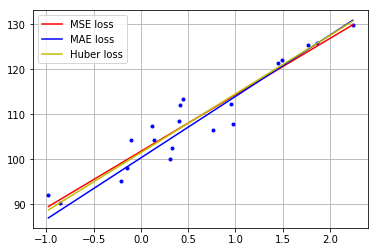

In [7]:
plt.grid()
plt.legend()

plt.show()

MSE быстро обучился, тогда как с MAE и HUBER были проблемы и пришлось сильно увеличить им допустимое количество операция, чтобы они наконец сошлись.

# With outliers

In [8]:
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() / 4.
X_outliers[2:, :] += X.min() - X.mean() / 4.
y_outliers[:2] += y.min() - y.mean() / 4.
y_outliers[2:] += y.max() + y.mean() / 4.
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))
plt.plot(X, y, 'b.')

In [9]:
params_values = {
    'MSE': {'loss': 'squared_loss', 'tol': 1e-10},
    'MAE': {'loss': 'epsilon_insensitive', 'epsilon': 0, 'tol': 1e-100, 'max_iter': 1000000},
    'Huber': {'loss': 'huber', 'tol': 1e-100, 'max_iter': 1000000},
}

In [10]:
colors = ['r-', 'b-', 'y-', 'm-']
reg_dict['outliers'] = {}

In [11]:
x = np.linspace(X.min(), X.max(), 7)
for k, (loss_name, params) in enumerate(params_values.items()):
    print(loss_name)
    reg = SGDRegressor(**params)
    reg.fit(X, y)
    reg_dict['outliers'][loss_name] = reg
    coef_ = reg.coef_[0] * x + reg.intercept_[0]
    plt.plot(x, coef_, colors[k], label=f"{loss_name} loss")

MSE
MAE
Huber


In [12]:
colors = ['r--', 'b--', 'y--', 'm--']
for k, (loss_name, reg) in enumerate(reg_dict['simple'].items()):
    coef_ = reg.coef_[0] * x + reg.intercept_[0]
    plt.plot(x, coef_, colors[k], label=f"{loss_name} loss before")

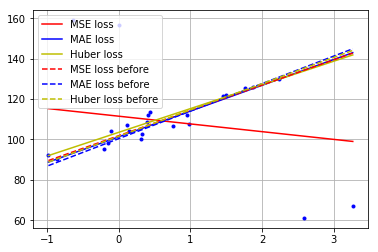

In [13]:
plt.grid()
plt.legend()

plt.show()

MSE сильно поменялся, тогда как huber и mae показали себя устойчивыми к выбросам.